In [1]:
import pandas as pd

In [3]:
#датасет1
news = pd.read_csv("C:/Users/Home/OneDrive/Рабочий стол/dataset_MO/articles.csv")
print(news.shape)
news.head(3)

(27000, 2)


,doc_id,title
0,6,Заместитель председателяnправительства РФnСерг...
1,4896,Матч 1/16 финала Кубка России по футболу был п...
2,4897,Форвард «Авангарда» Томаш Заборский прокоммент...


In [6]:
#датасет2
users = pd.read_csv("C:/Users/Home/OneDrive/Рабочий стол/dataset_MO/users_articles.csv")
users.head(3)

,uid,articles
0,u105138,"[293672, 293328, 293001, 293622, 293126, 1852]"
1,u108690,"[3405, 1739, 2972, 1158, 1599, 322665]"
2,u108339,"[1845, 2009, 2356, 1424, 2939, 323389]"


In [11]:
#датасет
target = pd.read_csv("C:/Users/Home/OneDrive/Рабочий стол/dataset_MO/users_churn.csv")
target.head(15)

,uid,churn
0,u107120,0
1,u102277,0
2,u102444,0
3,u103439,0
4,u104300,0
5,u102598,0
6,u107753,0
7,u103650,0
8,u106926,0
9,u103486,0


### получаем векторные представления пользователей


In [13]:
pip install gensim 

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.23
    Uninstalling Cython-0.29.23:
      Successfully uninstalled Cython-0.29.23
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install pymorphy2

Note: you may need to restart the kernel to use updated packages.
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=1937626db75d624bc086ad13c8f4429508b0c28442dcef7429e42e8c309cdcdf
  Stored in directory: c:\users\home\appdata\local\pip\cache\wheels\56\ea\58\ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt


In [17]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install razdel

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install razdel pymorphy2

Note: you may need to restart the kernel to use updated packages.


векторные представления новостей

In [26]:
from gensim.corpora.dictionary import Dictionary

In [27]:
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from razdel import tokenize 

import pymorphy2  

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
stopword_ru = stopwords.words('russian')
len(stopword_ru)

morph = pymorphy2.MorphAnalyzer()

In [33]:
with open('C:/Users/Home/OneDrive/Рабочий стол/dataset_MO/stopwords.txt') as f:
    additional_stopwords = [w.strip() for w in f.readlines() if w]
stopword_ru += additional_stopwords
len(stopword_ru)

776

In [35]:
def clean_text(text):

    if not isinstance(text, str):
        text = str(text)
    
    text = text.lower()
    text = text.strip('\n').strip('\r').strip('\t')
    text = re.sub("-\s\r\n\|-\s\r\n|\r\n", '', str(text))

    text = re.sub("[0-9]|[-—.,:;_%©«»?*!@#№$^•·&()]|[+=]|[[]|[]]|[/]|", '', text)
    text = re.sub(r"\r\n\t|\n|\\s|\r\t|\\n", ' ', text)
    text = re.sub(r'[\xad]|[\s+]', ' ', text.strip())
    
  
    return text

cache = {}



def lemmatization(text):
  

    if not isinstance(text, str):
        text = str(text)
    
    tokens = list(tokenize(text))
    words = [_.text for _ in tokens]

    words_lem = []
    for w in words:
        if w[0] == '-': 
            w = w[1:]
        if len(w)>1: 
            if w in cache: 
                words_lem.append(cache[w])
            else: 
                temp_cach = cache[w] = morph.parse(w)[0].normal_form
                words_lem.append(temp_cach)
    
    words_lem_without_stopwords=[i for i in words_lem if not i in stopword_ru] 
    
    return words_lem_without_stopwords

In [36]:
list(tokenize(news.iloc[0,1][:100],   ))

[Substring(0, 11, 'Заместитель'),
 Substring(12, 24, 'председателя'),
 Substring(24, 25, 'n'),
 Substring(25, 38, 'правительства'),
 Substring(39, 41, 'РФ'),
 Substring(41, 42, 'n'),
 Substring(42, 48, 'Сергей'),
 Substring(48, 49, 'n'),
 Substring(49, 55, 'Иванов'),
 Substring(55, 56, 'n'),
 Substring(56, 62, 'избран'),
 Substring(63, 76, 'председателем'),
 Substring(77, 83, 'совета'),
 Substring(83, 84, 'n'),
 Substring(84, 87, 'ПБК'),
 Substring(88, 92, 'ЦСКА'),
 Substring(92, 93, 'n'),
 Substring(93, 94, '.'),
 Substring(95, 98, 'Как'),
 Substring(99, 100, 'с')]

In [37]:
norm_text = news.iloc[:2,1].apply(lambda x: clean_text(x), 1)
norm_text

<ipython-input-35-9be567cf6cad>:12: FutureWarning: Possible nested set at position 39
  text = re.sub("[0-9]|[-—.,:;_%©«»?*!@#№$^•·&()]|[+=]|[[]|[]]|[/]|", '', text)


0    заместитель председателяnправительства рфnсерг...
1    матч  финала кубка россии по футболу был приос...
Name: title, dtype: object

In [38]:
norm_text = news.iloc[:2,1].apply(lambda x: clean_text(x), 1)
norm_text

0    заместитель председателяnправительства рфnсерг...
1    матч  финала кубка россии по футболу был приос...
Name: title, dtype: object

In [39]:
lemmatization(norm_text[0])

['заместитель',
 'председатель',
 'правительство',
 'рф',
 'сергей',
 'иванов',
 'избрать',
 'председатель',
 'совет',
 'пбк',
 'цска',
 'сообщать',
 'прессслужба',
 'армеец',
 'решение',
 'единогласно',
 'принять',
 'первый',
 'заседание',
 'совет',
 'клуб',
 'основной',
 'функция',
 'это',
 'орган',
 'обсуждение',
 'текущий',
 'состояние',
 'планирование',
 'утверждение',
 'стратегия',
 'развитие',
 'клуб',
 'близкий',
 'перспектива',
 'nn',
 'состав',
 'совет',
 'войти',
 'георгий',
 'полтавченко',
 'полномочный',
 'представитель',
 'президент',
 'центральный',
 'федеральный',
 'округ',
 'алексей',
 'седов',
 'генералполковник',
 'начальник',
 'служба',
 'защита',
 'конституционный',
 'строй',
 'борьба',
 'терроризм',
 'фсб',
 'рф',
 'nn',
 'александр',
 'новак',
 'заместитель',
 'министр',
 'финансы',
 'рф',
 'вячеслав',
 'полтавец',
 'заместитель',
 'генеральный',
 'директор',
 'руководитель',
 'блок',
 'взаимодействие',
 'орган',
 'власть',
 'социальный',
 'корпоративный',
 'поли

In [40]:
#кстати, достатчно быстро
%%time
news['title'] = news['title'].apply(lambda x: lemmatization(x), 1)

Wall time: 4min 50s


In [41]:
news['title']

0        [заместитель, председатель, правительство, рф,...
1        [матч, 1/16, финал, кубок, россия, футбол, при...
2        [форвард, авангард, томаш, заборский, прокомме...
3        [главный, тренер, кубань, юрий, красножанин, п...
4        [решение, попечительский, совет, владивостокск...
                               ...                        
26995    [учёный, токийский, университет, морской, наук...
26996    [глава, кафедра, отечественный, история, xx, в...
26997    [американский, учёный, уточнить, возраст, расп...
26998    [последний, 50, год, тропический, углеродный, ...
26999    [жить, примерно, тыс, год, назад, территория, ...
Name: title, Length: 27000, dtype: object

In [42]:
#сформируем список наших текстов, разбив еще и на пробелы
texts = [t for t in news['title'].values]

# Create a corpus from a list of texts
# создаем словарь из всех встречающихся в датасете слов
common_dictionary = Dictionary(texts)
common_corpus = [common_dictionary.doc2bow(text) for text in texts] #формируем bag of words

In [43]:
common_dictionary[4]

'армеец'

In [44]:
common_dictionary.id2token

{0: 'nn',
 1: 'александр',
 2: 'алексей',
 3: 'андрей',
 4: 'армеец',
 5: 'банк',
 6: 'баскетбол',
 7: 'близкий',
 8: 'блок',
 9: 'борьба',
 10: 'ватутин',
 11: 'взаимодействие',
 12: 'власть',
 13: 'войти',
 14: 'вячеслав',
 15: 'генерал-полковник',
 16: 'генеральный',
 17: 'георгий',
 18: 'гмк',
 19: 'директор',
 20: 'европа',
 21: 'единогласно',
 22: 'заместитель',
 23: 'заседание',
 24: 'защита',
 25: 'иванов',
 26: 'избрать',
 27: 'исакович',
 28: 'клиентский',
 29: 'клуб',
 30: 'конституционный',
 31: 'корпоративный',
 32: 'леонид',
 33: 'лопат',
 34: 'министр',
 35: 'мир',
 36: 'начальник',
 37: 'никель',
 38: 'новак',
 39: 'норильский',
 40: 'оао',
 41: 'обсуждение',
 42: 'округ',
 43: 'ольга',
 44: 'ооо',
 45: 'орган',
 46: 'основной',
 47: 'пбк',
 48: 'первый',
 49: 'перспектива',
 50: 'планирование',
 51: 'плешаков',
 52: 'политика',
 53: 'полномочный',
 54: 'полтавец',
 55: 'полтавченко',
 56: 'правительство',
 57: 'правление',
 58: 'председатель',
 59: 'представитель',
 60

Обучаем модель

In [45]:
from gensim.models import LdaModel

In [46]:
N_topic = 20

In [48]:
%%time
from gensim.models import LdaModel
# Train the model on the corpus.
lda = LdaModel(common_corpus, num_topics=N_topic, id2word=common_dictionary)#, passes=10)

Wall time: 34.6 s


In [49]:
from gensim.test.utils import datapath
# Save model to disk.
temp_file = datapath("model.lda")
lda.save(temp_file)

# Load a potentially pretrained model from disk.
lda = LdaModel.load(temp_file)

In [50]:
other_texts = [t for t in news['title'].iloc[:3]]
other_corpus = [common_dictionary.doc2bow(text) for text in other_texts]

unseen_doc = other_corpus[2]
print(other_texts[2])
lda[unseen_doc]

['форвард', 'авангард', 'томаш', 'заборский', 'прокомментировать', 'игра', 'свой', 'команда', 'матч', 'чемпионат', 'кхл', 'против', 'атланта', 'nn', 'провести', 'плохой', 'матч', 'нижний', 'новгород', 'против', 'торпедо', 'настраиваться', 'первый', 'минута', 'включиться', 'работа', 'сказать', 'заборский', 'получиться', 'забросить', 'быстрый', 'гол', 'задать', 'хороший', 'темп', 'поединок', 'мочь', 'играть', 'ещё', 'хороший', 'сторона', 'пять', 'очко', 'выезд', 'девять', 'это', 'хороший']


[(2, 0.39430648),
 (3, 0.23536737),
 (4, 0.1795633),
 (11, 0.12784757),
 (15, 0.04611113)]

In [51]:
x=lda.show_topics(num_topics=20, num_words=10,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

#Below Code Prints Only Words 
for topic,words in topics_words:
    print("topic_{}: ".format(topic)+" ".join(words))

topic_0: убийство человек полиция сотрудник следователь турецкий преступление подозревать жертва миллиард
topic_1: мужчина экипаж агентство произойти китай вода остров женщина китайский место
topic_2: это который мочь год свой весь человек всё время новый
topic_3: который исследование это год научный человек nn свой время сша
topic_4: взрыв com след 600 гражданин огонь обнаружить обращение курение помещение
topic_5: тело погибнуть журнал бомба жертва налог штат ресторан актёр 1,3
topic_6: это россия российский который гражданин население украинский страна снижение человек
topic_7: миссия белый вице-премьер штат дональд снять украина космонавт зима военный
topic_8: банк конкурс норма квартира комиссия финансы год градус авария фсб
topic_9: россия год который это также президент российский страна заявить глава
topic_10: военный район армия операция советский боевой год наука высота ссср
topic_11: фестиваль пройти гость сайт мероприятие организатор аналог держава запланировать состояться


In [52]:
news['title'].iloc[5]

['главное',
 'тренер',
 'вячеслав',
 'буцай',
 'прокомментировать',
 'победа',
 'югра',
 'матч',
 'регулярный',
 'чемпионат',
 'кхл',
 'nn',
 'прежде',
 'весь',
 'хотеть',
 'поблагодарить',
 'свой',
 'ребята',
 'весь',
 'команда',
 'передавать',
 'слово',
 'официальный',
 'сайт',
 'югра',
 'игра',
 'начинаться',
 'очень',
 'удачно',
 'пропустить',
 'гол',
 'первый',
 'смена',
 'долго',
 'входить',
 'игра',
 'мочь',
 'это',
 'связать',
 'это',
 'дневный',
 'матч',
 'непривычный',
 'время',
 'плюс',
 'это',
 'третий',
 'матч',
 'сибирь',
 'где-то',
 'ребята',
 'чувствовать',
 'скажем',
 'сонный',
 'второй',
 'третий',
 'период',
 'показать',
 'разбежаться',
 'стать',
 'играть',
 'правильно',
 'появиться',
 'момент',
 'дотерпеть',
 'считать',
 'заслуженно',
 'победить']

In [53]:
lda[common_dictionary.doc2bow(news['title'].iloc[10])]

[(1, 0.04124937),
 (6, 0.09594029),
 (9, 0.2787913),
 (11, 0.22231665),
 (14, 0.26932552),
 (19, 0.06980471)]

In [54]:
def get_lda_vector(text):
    unseen_doc = common_dictionary.doc2bow(text)
    lda_tuple = lda[unseen_doc]
    not_null_topics = dict(zip([i[0] for i in lda_tuple], [i[1] for i in lda_tuple]))

    output_vector = []
    for i in range(20):
        if i not in not_null_topics:
            output_vector.append(0)
        else:
            output_vector.append(not_null_topics[i])
    return np.array(output_vector)

In [55]:
topic_matrix = pd.DataFrame([get_lda_vector(text) for text in news['title'].values])
topic_matrix.columns = ['topic_{}'.format(i) for i in range(N_topic)]
topic_matrix['doc_id'] = news['doc_id'].values
topic_matrix = topic_matrix[['doc_id']+['topic_{}'.format(i) for i in range(N_topic)]]
topic_matrix.head(5)

,doc_id,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,6,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.56016,...,0.0,0.000000,0.054455,0.011186,0.0,0.000000,0.000000,0.0,0.0,0.0
1,4896,0.0,0.0,0.000000,0.00000,0.801144,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.000000,0.000000,0.0,0.108855,0.068743,0.0,0.0,0.0
2,4897,0.0,0.0,0.394241,0.23544,0.179552,0.0,0.0,0.0,0.00000,...,0.0,0.127846,0.000000,0.000000,0.0,0.046116,0.000000,0.0,0.0,0.0
3,4898,0.0,0.0,0.853802,0.00000,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.059649,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
4,4899,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.125903,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0


In [56]:
users.head(10)

,uid,articles
0,u105138,"[293672, 293328, 293001, 293622, 293126, 1852]"
1,u108690,"[3405, 1739, 2972, 1158, 1599, 322665]"
2,u108339,"[1845, 2009, 2356, 1424, 2939, 323389]"
3,u101138,"[5933, 6186, 5055, 6977, 5206, 488389]"
4,u108248,"[707, 1144, 2532, 2928, 3133, 324592]"
5,u106662,"[323868, 323426, 324267, 322426, 324104, 1550]"
6,u105949,"[293138, 294471, 295012, 294736, 293949, 3544]"
7,u102457,"[6928, 5009, 6940, 7629, 7644, 512736]"
8,u104124,"[322838, 324699, 322991, 322120, 324327, 472331]"
9,u101386,"[7827, 6427, 7394, 7151, 6335, 487254]"


In [57]:
doc_dict = dict(zip(topic_matrix['doc_id'].values, topic_matrix[['topic_{}'.format(i) for i in range(20)]].values))

In [58]:
doc_dict[293622]

array([0.        , 0.        , 0.        , 0.29000199, 0.        ,
       0.04612945, 0.20645159, 0.02041766, 0.        , 0.21891528,
       0.        , 0.        , 0.03989556, 0.        , 0.07067502,
       0.        , 0.        , 0.0350324 , 0.        , 0.0642581 ])

In [59]:
user_articles_list = users['articles'].iloc[33]

# Функция для получения вектора пользователя по темам прочитанных статей
def get_user_embedding(user_articles_list):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    user_vector = np.mean(user_vector, 0)
    return user_vector

In [60]:
user_articles_list = users['articles'].iloc[33]

vv = get_user_embedding(user_articles_list)
vv

array([0.04115934, 0.        , 0.14541827, 0.08602046, 0.        ,
       0.00179027, 0.09073691, 0.00312516, 0.        , 0.37095139,
       0.05211878, 0.        , 0.        , 0.        , 0.17340225,
       0.        , 0.02076552, 0.00242756, 0.        , 0.        ])

In [61]:
user_embeddings = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding(x), 1)])
user_embeddings.columns = ['topic_{}'.format(i) for i in range(N_topic)]
user_embeddings['uid'] = users['uid'].values
user_embeddings = user_embeddings[['uid']+['topic_{}'.format(i) for i in range(N_topic)]]
user_embeddings.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,u105138,0.017855,0.007791,0.008389,0.203497,0.005626,0.023153,0.151746,0.019120,0.006030,...,0.041695,0.021611,0.027166,0.005121,0.172249,0.0,0.009167,0.005839,0.000000,0.027172
1,u108690,0.064007,0.009358,0.191133,0.076408,0.004307,0.008107,0.199296,0.005078,0.020247,...,0.013477,0.002655,0.000000,0.005477,0.061404,0.0,0.011686,0.004254,0.000000,0.002341
2,u108339,0.083951,0.033633,0.077747,0.115413,0.019371,0.006107,0.076280,0.003163,0.038320,...,0.028083,0.000000,0.028096,0.006224,0.079920,0.0,0.008572,0.000000,0.002843,0.026681


In [62]:
X = pd.merge(user_embeddings, target, 'left')
X.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,churn
0,u105138,0.017855,0.007791,0.008389,0.203497,0.005626,0.023153,0.151746,0.019120,0.006030,...,0.021611,0.027166,0.005121,0.172249,0.0,0.009167,0.005839,0.000000,0.027172,0
1,u108690,0.064007,0.009358,0.191133,0.076408,0.004307,0.008107,0.199296,0.005078,0.020247,...,0.002655,0.000000,0.005477,0.061404,0.0,0.011686,0.004254,0.000000,0.002341,1
2,u108339,0.083951,0.033633,0.077747,0.115413,0.019371,0.006107,0.076280,0.003163,0.038320,...,0.000000,0.028096,0.006224,0.079920,0.0,0.008572,0.000000,0.002843,0.026681,1


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#import itertools

import matplotlib.pyplot as plt

%matplotlib inline

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X[['topic_{}'.format(i) for i in range(N_topic)]], 
                                                    X['churn'], random_state=0)

In [65]:
logreg = LogisticRegression()
#обучим 
logreg.fit(X_train, y_train)

LogisticRegression()

In [66]:
preds = logreg.predict_proba(X_test)[:, 1]
preds[:10]

array([0.12984793, 0.03661681, 0.30178157, 0.16508881, 0.04737178,
       0.08324085, 0.0955048 , 0.2072669 , 0.07191077, 0.08429374])

In [67]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, confusion_matrix

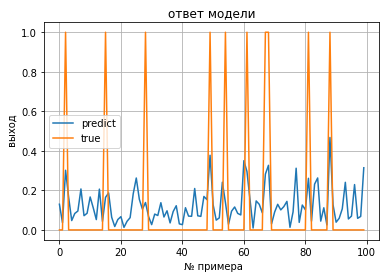

In [68]:
plt.plot( preds[:100], label = 'predict')
plt.plot(y_test.values[:100], label = 'true')
plt.title('ответ модели')
plt.xlabel(' № примера')
plt.ylabel(' выход')
plt.legend()
plt.grid('On')
plt.show()

In [69]:
precision, recall, thresholds = precision_recall_curve(y_test.values[:1000], preds[:1000])

n=-1
fscore = (2 * precision * recall) / (precision + recall)

# locate the index of the largest f score
ix_ = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix_], 
                                                                        fscore[ix_],
                                                                        precision[ix_],
                                                                        recall[ix_]))

Best Threshold=0.242166, F-Score=0.583, Precision=0.576, Recall=0.590


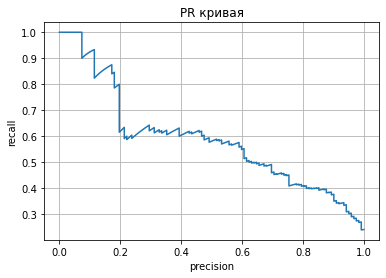

In [70]:
plt.plot(recall,precision )
plt.title('PR кривая')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid('On')
plt.show()

In [71]:
import itertools

In [72]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1660   95]
 [ 100  145]]


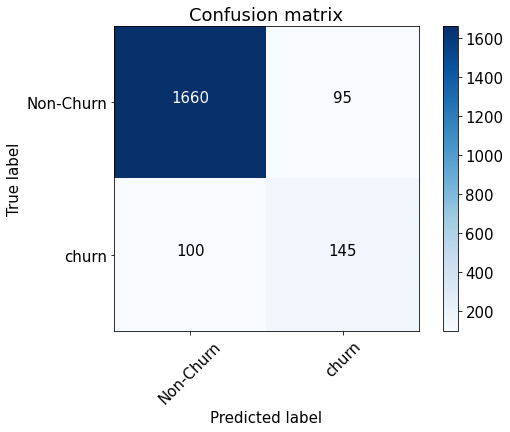

In [73]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, preds>thresholds[ix_])
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['Non-Churn', 'churn'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [74]:
roc_auc_score_ = roc_auc_score(y_test, preds)
roc_auc_score_

0.920053491482063

2. Модифицировать код функции get_user_embedding таким образом, чтобы считалось не среднее (как в примере np.mean), а медиана. Применить такое преобразование к данным, обучить модель прогнозирования оттока и посчитать метрики качества и сохранить их: roc auc, precision/recall/f_score (для 3 последних - подобрать оптимальный порог с помощью precision_recall_curve, как это делалось на уроке)

In [75]:
def get_user_embedding_median(user_articles_list):
    user_articles_list = eval(user_articles_list)
    user_vector1 = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    user_vector1 = np.median(user_vector1, 0)
    return user_vector1

In [76]:
user_embeddings = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding_median(x), 1)])
user_embeddings.columns = ['topic_{}'.format(i) for i in range(N_topic)]
user_embeddings['uid'] = users['uid'].values
user_embeddings = user_embeddings[['uid']+['topic_{}'.format(i) for i in range(N_topic)]]

X = pd.merge(user_embeddings, target, 'left')
X.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,churn
0,u105138,0.000000,0.0,0.000000,0.250491,0.000000,0.017211,0.176488,0.0,0.000000,...,0.0,0.012265,0.0,0.080486,0.0,0.0,0.0,0.0,0.0,0
1,u108690,0.013372,0.0,0.171957,0.066929,0.000000,0.000000,0.196203,0.0,0.013815,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
2,u108339,0.085012,0.0,0.066447,0.113392,0.007088,0.000000,0.055417,0.0,0.026435,...,0.0,0.000000,0.0,0.068558,0.0,0.0,0.0,0.0,0.0,1


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X[['topic_{}'.format(i) for i in range(N_topic)]], 
                                                    X['churn'], random_state=0, test_size=0.25)

In [78]:
logreg = LogisticRegression(C=1.0)
#обучим наш пайплайн
logreg.fit(X_train, y_train)
preds = logreg.predict_proba(X_test)[:, 1]

In [79]:
precision1, recall1, thresholds1 = precision_recall_curve(y_test.values[:1000], preds[:1000])

n=-1
fscore1 = (2 * precision1 * recall1) / (precision1 + recall1)

# locate the index of the largest f score
ix1 = np.argmax(fscore1)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds1[ix1], 
                                                                        fscore1[ix1],
                                                                        precision1[ix1],
                                                                        recall1[ix1]))

Best Threshold=0.228666, F-Score=0.696, Precision=0.592, Recall=0.844


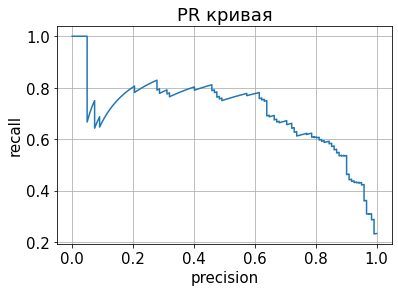

In [80]:
plt.plot(recall1,precision1 )
plt.title('PR кривая')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid('On')
plt.show()

Confusion matrix, without normalization
[[1654  101]
 [  66  179]]


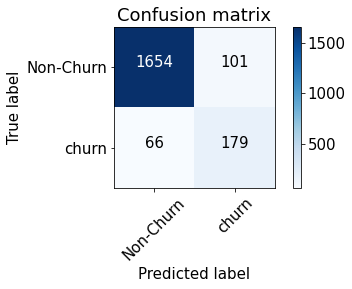

In [81]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, preds>thresholds1[ix_])
plt.figure(figsize=(6, 4))
plot_confusion_matrix(cnf_matrix, classes=['Non-Churn', 'churn'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [82]:
roc_auc_score1 = roc_auc_score(y_test, preds)
roc_auc_score1

0.9484109541252398

3. Повторить п.2, но используя уже не медиану, а max

In [83]:
def get_user_embedding_max(user_articles_list):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    user_vector1 = np.max(user_vector, 0)  
    return user_vector1

In [84]:
user_embeddings = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding_max(x), 1)])
user_embeddings.columns = ['topic_{}'.format(i) for i in range(N_topic)]
user_embeddings['uid'] = users['uid'].values
user_embeddings = user_embeddings[['uid']+['topic_{}'.format(i) for i in range(N_topic)]]

X = pd.merge(user_embeddings, target, 'left')
X.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,churn
0,u105138,0.107132,0.028837,0.050335,0.379492,0.033757,0.058368,0.313146,0.094302,0.036182,...,0.088482,0.098570,0.030729,0.463842,0.0,0.055000,0.035032,0.000000,0.098772,0
1,u108690,0.234488,0.034846,0.311041,0.183514,0.013852,0.048644,0.255735,0.015369,0.047367,...,0.015932,0.000000,0.032864,0.186186,0.0,0.070114,0.025527,0.000000,0.014047,1
2,u108339,0.198554,0.143744,0.187352,0.206622,0.054165,0.024736,0.172706,0.018975,0.090791,...,0.000000,0.131451,0.037342,0.186891,0.0,0.038831,0.000000,0.017057,0.122766,1


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X[['topic_{}'.format(i) for i in range(N_topic)]], 
                                                    X['churn'], random_state=0, test_size=0.25)

In [86]:
logreg = LogisticRegression(C=1.0)
#обучим наш пайплайн
logreg.fit(X_train, y_train)
preds = logreg.predict_proba(X_test)[:, 1]

In [87]:
precision2, recall2, thresholds2 = precision_recall_curve(y_test.values[:1000], preds[:1000])

n=-1
fscore2 = (2 * precision2 * recall2) / (precision2 + recall2)

# locate the index of the largest f score
ix2 = np.argmax(fscore2)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds2[ix2], 
                                                                        fscore2[ix2],
                                                                        precision2[ix2],
                                                                        recall2[ix2]))

Best Threshold=0.326467, F-Score=0.659, Precision=0.646, Recall=0.672


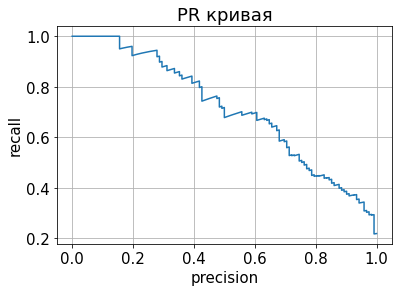

In [88]:
plt.plot(recall2,precision2 )
plt.title('PR кривая')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid('On')
plt.show()


Confusion matrix, without normalization
[[1589  166]
 [  60  185]]


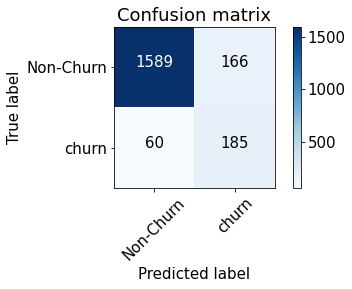

In [89]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, preds>thresholds2[ix_])
plt.figure(figsize=(6, 4))
plot_confusion_matrix(cnf_matrix, classes=['Non-Churn', 'churn'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [90]:
roc_auc_score2 = roc_auc_score(y_test, preds)
roc_auc_score2

0.9367358567358568

5. Сформировать на выходе единую таблицу, сравнивающую качество 3 разных метода получения эмбедингов пользователей: mean, median, max, idf_mean по метрикам roc_auc, precision, recall, f_score

In [91]:
evaluation = pd.DataFrame({
    'тип усреднения': ['mean', 'median', 'max'],
    'precision': [precision[ix_], precision1[ix1], precision2[ix2]],
    'recall': [recall[ix_], recall1[ix1], recall2[ix2]],
    'F score': [fscore[ix_], fscore1[ix1], fscore2[ix2]],
    'ROC-AUC score': [roc_auc_score_, roc_auc_score1, roc_auc_score2],
})

evaluation

,тип усреднения,precision,recall,F score,ROC-AUC score
0,mean,0.576000,0.590164,0.582996,0.920053
1,median,0.591954,0.844262,0.695946,0.948411
2,max,0.645669,0.672131,0.658635,0.936736
